# สมาชิก
## 1. นายธีรภัทร ศิริธรรม   6509611809
## 2. นายภูริพัทธ์ คงสักบัน   6509611965
## 3. นายชยธร พฤกษ์รัตนนภา 6509611635

# Problem Framing

## Topic : Clock Speed (Freq) มีผลต่อ TDP หรือไม่
### เราจะเทียบข้อมูลของ Freq (clock speed) และ TDP (ค่าพลังงานความร้อนที่เกิดขึ้น ในขณะที่โปรเซสเซอร์ทำงานเต็มกำลัง) ว่ามีความสัมพันธ์กันอย่างไร

# Data collection
### เราจะใช้ข้อมูลทุติยภูมิ โดย import csv file มาจาก dataset ใน website kaggle

## 1.Import Libraries

In [1]:
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt

## 2.Read CSV file

In [2]:
df = pd.read_csv('./chip_dataset.csv')
df

Unnamed: 0                  Product Type Release Date  \
0              0      AMD Athlon 64 3500+  CPU   2007-02-20   
1              1         AMD Athlon 200GE  CPU   2018-09-06   
2              2     Intel Core i5-1145G7  CPU   2020-09-02   
3              3    Intel Xeon E5-2603 v2  CPU   2013-09-01   
4              4  AMD Phenom II X4 980 BE  CPU   2011-05-03   
...          ...                      ...  ...          ...   
4849        4849      NVIDIA Quadro 3000M  GPU   2011-02-22   
4850        4850            Intel GMA 950  GPU   2005-06-01   
4851        4851   NVIDIA GeForce GT 320M  GPU   2010-03-03   
4852        4852   NVIDIA GeForce FX 5200  GPU   2003-03-06   
4853        4853   NVIDIA GeForce 9300 SE  GPU   2008-06-01   

      Process Size (nm)  TDP (W)  Die Size (mm^2)  Transistors (million)  \
0                  65.0     45.0             77.0                  122.0   
1                  14.0     35.0            192.0                 4800.0   
2                  10.0     28.0              NaN                    NaN   
3                  22.0     80.0            160.0                 1400.0   
4                  45.0    125.0            258.0                  758.0   
...                 ...      ...              ...                    ...   
4849               40.0     75.0            332.0                 1950.0   
4850               90.0      7.0              NaN                    NaN   
4851               40.0     23.0            100.0                  486.0   
4852              150.0      NaN             65.0                   29.0   
4853               65.0      NaN             86.0                  210.0   

      Freq (MHz)  Foundry  Vendor  FP16 GFLOPS  FP32 GFLOPS  FP64 GFLOPS  
0         2200.0  Unknown     AMD          NaN          NaN          NaN  
1         3200.0  Unknown     AMD          NaN          NaN          NaN  
2         2600.0    Intel   Intel          NaN          NaN          NaN  
3         1800.0    Intel   Intel          NaN          NaN          NaN  
4         3700.0  Unknown     AMD          NaN          NaN          NaN  
...          ...      ...     ...          ...          ...          ...  
4849       450.0     TSMC  NVIDIA          NaN        432.0         36.0  
4850       250.0    Intel   Intel          NaN          NaN          NaN  
4851       500.0     TSMC  NVIDIA          NaN         52.8          NaN  
4852       250.0     TSMC  NVIDIA          NaN          NaN          NaN  
4853       540.0     TSMC  NVIDIA          NaN         20.8          NaN  

[4854 rows x 14 columns]

# Data Preparation

## 1. Scope Table to interest one and clear the one we don't

In [3]:
df_new = df.loc[: , 'Product' : 'Vendor']
df_new

Product Type Release Date  Process Size (nm)  TDP (W)  \
0         AMD Athlon 64 3500+  CPU   2007-02-20               65.0     45.0   
1            AMD Athlon 200GE  CPU   2018-09-06               14.0     35.0   
2        Intel Core i5-1145G7  CPU   2020-09-02               10.0     28.0   
3       Intel Xeon E5-2603 v2  CPU   2013-09-01               22.0     80.0   
4     AMD Phenom II X4 980 BE  CPU   2011-05-03               45.0    125.0   
...                       ...  ...          ...                ...      ...   
4849      NVIDIA Quadro 3000M  GPU   2011-02-22               40.0     75.0   
4850            Intel GMA 950  GPU   2005-06-01               90.0      7.0   
4851   NVIDIA GeForce GT 320M  GPU   2010-03-03               40.0     23.0   
4852   NVIDIA GeForce FX 5200  GPU   2003-03-06              150.0      NaN   
4853   NVIDIA GeForce 9300 SE  GPU   2008-06-01               65.0      NaN   

      Die Size (mm^2)  Transistors (million)  Freq (MHz)  Foundry  Vendor  
0                77.0                  122.0      2200.0  Unknown     AMD  
1               192.0                 4800.0      3200.0  Unknown     AMD  
2                 NaN                    NaN      2600.0    Intel   Intel  
3               160.0                 1400.0      1800.0    Intel   Intel  
4               258.0                  758.0      3700.0  Unknown     AMD  
...               ...                    ...         ...      ...     ...  
4849            332.0                 1950.0       450.0     TSMC  NVIDIA  
4850              NaN                    NaN       250.0    Intel   Intel  
4851            100.0                  486.0       500.0     TSMC  NVIDIA  
4852             65.0                   29.0       250.0     TSMC  NVIDIA  
4853             86.0                  210.0       540.0     TSMC  NVIDIA  

[4854 rows x 10 columns]

## 2.Drop Duplicate

In [4]:
df_new = df_new.drop_duplicates(subset = ['Product'] , keep = 'first') #dropping duplicates data
df_new

Product Type Release Date  Process Size (nm)  \
0               AMD Athlon 64 3500+  CPU   2007-02-20               65.0   
1                  AMD Athlon 200GE  CPU   2018-09-06               14.0   
2              Intel Core i5-1145G7  CPU   2020-09-02               10.0   
3             Intel Xeon E5-2603 v2  CPU   2013-09-01               22.0   
4           AMD Phenom II X4 980 BE  CPU   2011-05-03               45.0   
...                             ...  ...          ...                ...   
4846  NVIDIA Playstation 3 GPU 28nm  GPU   2013-06-03               28.0   
4847                  XGI Volari V3  GPU   2003-09-15              130.0   
4848       NVIDIA GeForce FX Go5100  GPU   2003-03-01              150.0   
4849            NVIDIA Quadro 3000M  GPU   2011-02-22               40.0   
4853         NVIDIA GeForce 9300 SE  GPU   2008-06-01               65.0   

      TDP (W)  Die Size (mm^2)  Transistors (million)  Freq (MHz)  Foundry  \
0        45.0             77.0                  122.0      2200.0  Unknown   
1        35.0            192.0                 4800.0      3200.0  Unknown   
2        28.0              NaN                    NaN      2600.0    Intel   
3        80.0            160.0                 1400.0      1800.0    Intel   
4       125.0            258.0                  758.0      3700.0  Unknown   
...       ...              ...                    ...         ...      ...   
4846     21.0             68.0                  302.0       550.0     Sony   
4847      NaN              NaN                   25.0       200.0      UMC   
4848      NaN            124.0                   45.0       200.0     TSMC   
4849     75.0            332.0                 1950.0       450.0     TSMC   
4853      NaN             86.0                  210.0       540.0     TSMC   

      Vendor  
0        AMD  
1        AMD  
2      Intel  
3      Intel  
4        AMD  
...      ...  
4846  NVIDIA  
4847   Other  
4848  NVIDIA  
4849  NVIDIA  
4853  NVIDIA  

[4278 rows x 10 columns]

## 3. Drop NaN of Freq and TDP

In [5]:
df_new.dropna(subset = ['TDP (W)' , 'Freq (MHz)'] , inplace = True) #dropping NaN value in column we interest
df_new

C:\Users\TEE_R\AppData\Local\Temp\ipykernel_17876\478912097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.dropna(subset = ['TDP (W)' , 'Freq (MHz)'] , inplace = True) #dropping NaN value in column we interest


Product Type Release Date  Process Size (nm)  \
0               AMD Athlon 64 3500+  CPU   2007-02-20               65.0   
1                  AMD Athlon 200GE  CPU   2018-09-06               14.0   
2              Intel Core i5-1145G7  CPU   2020-09-02               10.0   
3             Intel Xeon E5-2603 v2  CPU   2013-09-01               22.0   
4           AMD Phenom II X4 980 BE  CPU   2011-05-03               45.0   
...                             ...  ...          ...                ...   
4841  NVIDIA GeForce 6800 Ultra DDL  GPU   2004-04-14              130.0   
4844              ATI FirePro V7800  GPU   2010-04-26               40.0   
4845             NVIDIA Tegra 3 GPU  GPU   2011-11-09               40.0   
4846  NVIDIA Playstation 3 GPU 28nm  GPU   2013-06-03               28.0   
4849            NVIDIA Quadro 3000M  GPU   2011-02-22               40.0   

      TDP (W)  Die Size (mm^2)  Transistors (million)  Freq (MHz)  Foundry  \
0        45.0             77.0                  122.0      2200.0  Unknown   
1        35.0            192.0                 4800.0      3200.0  Unknown   
2        28.0              NaN                    NaN      2600.0    Intel   
3        80.0            160.0                 1400.0      1800.0    Intel   
4       125.0            258.0                  758.0      3700.0  Unknown   
...       ...              ...                    ...         ...      ...   
4841    100.0            287.0                  222.0       400.0     TSMC   
4844    150.0            334.0                 2154.0       700.0     TSMC   
4845     20.0             80.0                   10.0       416.0     TSMC   
4846     21.0             68.0                  302.0       550.0     Sony   
4849     75.0            332.0                 1950.0       450.0     TSMC   

      Vendor  
0        AMD  
1        AMD  
2      Intel  
3      Intel  
4        AMD  
...      ...  
4841  NVIDIA  
4844     ATI  
4845  NVIDIA  
4846  NVIDIA  
4849  NVIDIA  

[3737 rows x 10 columns]

## 4. Split table By Group CPU and GPU

In [6]:
df_cpu = df_new[df['Type'] == "CPU"]
df_gpu = df_new[df['Type'] == "GPU"]

C:\Users\TEE_R\AppData\Local\Temp\ipykernel_17876\3446607962.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cpu = df_new[df['Type'] == "CPU"]
C:\Users\TEE_R\AppData\Local\Temp\ipykernel_17876\3446607962.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_gpu = df_new[df['Type'] == "GPU"]


### CPU table :

In [7]:
df_cpu.reset_index(inplace = True , drop = True) # reset index of cpu table
df_cpu

Product Type Release Date  Process Size (nm)  TDP (W)  \
0         AMD Athlon 64 3500+  CPU   2007-02-20               65.0     45.0   
1            AMD Athlon 200GE  CPU   2018-09-06               14.0     35.0   
2        Intel Core i5-1145G7  CPU   2020-09-02               10.0     28.0   
3       Intel Xeon E5-2603 v2  CPU   2013-09-01               22.0     80.0   
4     AMD Phenom II X4 980 BE  CPU   2011-05-03               45.0    125.0   
...                       ...  ...          ...                ...      ...   
1912      Intel Core i3-7100T  CPU   2017-01-03               14.0     35.0   
1913      Intel Core i7-9850H  CPU   2019-04-23               14.0     45.0   
1914    Intel Xeon Gold 6312U  CPU   2021-04-06               10.0    185.0   
1915        AMD Ryzen 9 4900H  CPU   2020-03-16                7.0     54.0   
1916   Intel Core 2 Duo E6550  CPU   2007-07-01               65.0     65.0   

      Die Size (mm^2)  Transistors (million)  Freq (MHz)  Foundry Vendor  
0                77.0                  122.0      2200.0  Unknown    AMD  
1               192.0                 4800.0      3200.0  Unknown    AMD  
2                 NaN                    NaN      2600.0    Intel  Intel  
3               160.0                 1400.0      1800.0    Intel  Intel  
4               258.0                  758.0      3700.0  Unknown    AMD  
...               ...                    ...         ...      ...    ...  
1912              NaN                    NaN      3400.0    Intel  Intel  
1913            149.0                    NaN      2600.0    Intel  Intel  
1914              NaN                    NaN      2400.0    Intel  Intel  
1915            156.0                 9800.0      3300.0     TSMC    AMD  
1916            143.0                  291.0      2333.0    Intel  Intel  

[1917 rows x 10 columns]

# ---------------------------------------------------------------------------------------------------------

### GPU table:

In [8]:
df_gpu.reset_index(inplace = True , drop = True) #reset index of gpu table
df_gpu

Product Type Release Date  Process Size (nm)  \
0                Intel Xeon E3-1275  GPU   2011-04-03               32.0   
1        NVIDIA GeForce MX150 GP107  GPU   2019-02-23               14.0   
2            ATI Radeon HD 4350 AGP  GPU   2008-09-30               55.0   
3               ATI Radeon X700 AGP  GPU   2004-09-01              110.0   
4            ATI Radeon HD 2900 PRO  GPU   2007-12-12               80.0   
...                             ...  ...          ...                ...   
1815  NVIDIA GeForce 6800 Ultra DDL  GPU   2004-04-14              130.0   
1816              ATI FirePro V7800  GPU   2010-04-26               40.0   
1817             NVIDIA Tegra 3 GPU  GPU   2011-11-09               40.0   
1818  NVIDIA Playstation 3 GPU 28nm  GPU   2013-06-03               28.0   
1819            NVIDIA Quadro 3000M  GPU   2011-02-22               40.0   

      TDP (W)  Die Size (mm^2)  Transistors (million)  Freq (MHz)  Foundry  \
0        95.0            216.0                 1160.0       100.0    Intel   
1        25.0            132.0                 3300.0      1469.0  Samsung   
2        20.0             73.0                  242.0       600.0     TSMC   
3        44.0            156.0                  120.0       400.0     TSMC   
4       200.0            420.0                  720.0       600.0     TSMC   
...       ...              ...                    ...         ...      ...   
1815    100.0            287.0                  222.0       400.0     TSMC   
1816    150.0            334.0                 2154.0       700.0     TSMC   
1817     20.0             80.0                   10.0       416.0     TSMC   
1818     21.0             68.0                  302.0       550.0     Sony   
1819     75.0            332.0                 1950.0       450.0     TSMC   

      Vendor  
0      Intel  
1     NVIDIA  
2        ATI  
3        ATI  
4        ATI  
...      ...  
1815  NVIDIA  
1816     ATI  
1817  NVIDIA  
1818  NVIDIA  
1819  NVIDIA  

[1820 rows x 10 columns]

# ---------------------------------------------------------------------------------------------------------

# EDA

## scatter plot that show relation of TDP and Frequency

### CPU:

In [9]:
X = df_cpu['Freq (MHz)']
Y = df_cpu['TDP (W)']

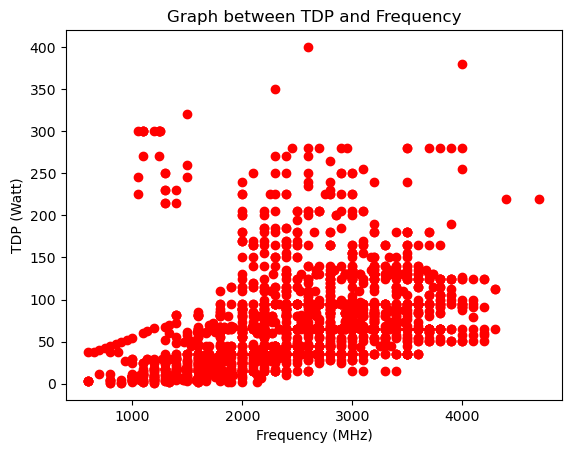

In [10]:
plt.scatter(X,Y, c = 'red')
plt.xlabel("Frequency (MHz)")
plt.ylabel("TDP (Watt)")
plt.title("Graph between TDP and Frequency")
plt.show()

# ---------------------------------------------------------------------------------------------------------

### GPU:

In [11]:
X = df_gpu['Freq (MHz)']
Y = df_gpu['TDP (W)']

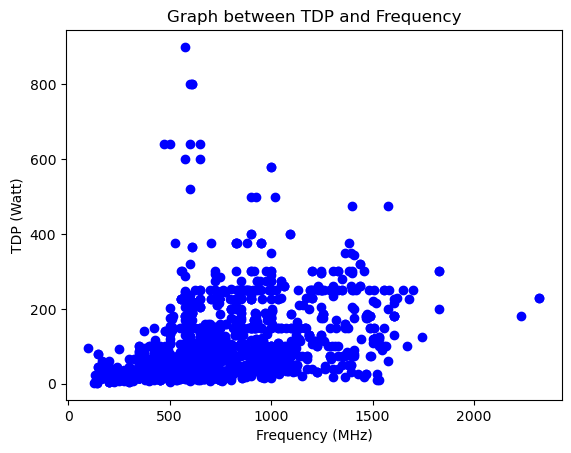

In [12]:
plt.scatter(X,Y, c = 'blue')
plt.xlabel("Frequency (MHz)")
plt.ylabel("TDP (Watt)")
plt.title("Graph between TDP and Frequency")
plt.show()

### พบว่ามีข้อมูลบางส่วนนั้น Frequency สูง และ TDP ต่ำ และมีข้อมูลบางส่วนนั้น Frequency ต่ำ และ TDP สูง

# ---------------------------------------------------------------------------------------------------------

## Covariance and Correlation between TDP and Frequency

### CPU:

In [23]:
x = df_cpu['Freq (MHz)']
y = df_cpu['TDP (W)']

### CPU Covariance

In [31]:
cov = np.round(st.covariance(x,y), decimals = 4)
cov

14416.5624

### CPU Correlation

In [29]:
corr =np.round(st.correlation(x,y), decimals = 4)
corr

0.327

### พบว่า CPU มี Covariance > 0 นั่นคือ ยิ่งค่าใดเพิ่ม อีกค่าก็มีโอกาสเพิ่ม แต่ Correlation ต่ำกว่า 0.5 ทำให้ทราบว่ามีความสัมพันธ์ที่ว่าน้อยมาก

### GPU:

In [32]:
x = df_gpu['Freq (MHz)']
y = df_gpu['TDP (W)']

In [33]:
cov = np.round(st.covariance(x,y), decimals = 4)
cov

12974.3973

In [34]:
corr =np.round(st.correlation(x,y), decimals = 4)
corr

0.4074

### พบว่า GPU มี Covariance > 0 นั่นคือ ยิ่งค่าใดเพิ่ม อีกค่าก็มีโอกาสเพิ่ม แต่ Correlation ต่ำกว่า 0.5 ทำให้ทราบว่ามีความสัมพันธ์ที่ว่าน้อยมาก

# ---------------------------------------------------------------------------------------------------------

# Data Interpretation

In [13]:
df_cpu.sort_values(by = ['Freq (MHz)'])

Product Type Release Date  Process Size (nm)  TDP (W)  \
1544         Intel Atom E625CT  CPU   2010-11-22               45.0      3.0   
254                 Intel A100  CPU   2007-06-01               90.0      3.0   
317           Intel Atom E620T  CPU   2010-09-14               45.0      3.0   
1341          Intel Atom E625C  CPU   2010-11-22               45.0      3.0   
1247            AMD Athlon 600  CPU   2000-06-05              180.0     38.0   
...                        ...  ...          ...                ...      ...   
1023  Intel Pentium Gold G6605  CPU   2021-03-16               14.0     65.0   
228        Intel Core i7-7740X  CPU   2017-06-26               14.0    112.0   
1321       Intel Core i3-7360X  CPU   2017-10-03               14.0    112.0   
681                AMD FX-9370  CPU   2013-07-06               32.0    220.0   
217                AMD FX-9590  CPU   2013-07-06               32.0    220.0   

      Die Size (mm^2)  Transistors (million)  Freq (MHz)  Foundry Vendor  
1544             26.0                   47.0       600.0    Intel  Intel  
254              66.0                  176.0       600.0    Intel  Intel  
317              26.0                   47.0       600.0    Intel  Intel  
1341             26.0                   47.0       600.0    Intel  Intel  
1247            120.0                   37.0       600.0  Unknown    AMD  
...               ...                    ...         ...      ...    ...  
1023              NaN                    NaN      4300.0    Intel  Intel  
228               NaN                    NaN      4300.0    Intel  Intel  
1321              NaN                    NaN      4300.0    Intel  Intel  
681             315.0                 1200.0      4400.0  Unknown    AMD  
217             315.0                 1200.0      4700.0  Unknown    AMD  

[1917 rows x 10 columns]

### CPU ที่มี clock speed น้อยที่สุดคือ Intel Atom E625CT ที่ 0.6 GHz

# ---------------------------------------------------------------------------------------------------------

In [14]:
df_cpu.sort_values(by = ['TDP (W)'])

Product Type Release Date  Process Size (nm)  TDP (W)  \
1735           Intel Atom Z600  CPU   2010-05-04               45.0      1.0   
59             Intel Atom Z515  CPU   2009-04-08               45.0      1.0   
1567           Intel Atom Z610  CPU   2010-05-04               45.0      1.0   
1392           Intel Atom Z500  CPU   2008-04-02               45.0      1.0   
1905           Intel Atom Z612  CPU   2010-05-04               45.0      1.0   
...                        ...  ...          ...                ...      ...   
633       Intel Xeon Phi SE10X  CPU   2012-11-12               22.0    300.0   
510        Intel Xeon Phi 7295  CPU   2017-12-01               14.0    320.0   
1156  Intel Xeon Platinum 9242  CPU   2019-04-02               14.0    350.0   
1788     Intel Core i9-10990XE  CPU          NaT               14.0    380.0   
1081  Intel Xeon Platinum 9282  CPU   2019-04-02               14.0    400.0   

      Die Size (mm^2)  Transistors (million)  Freq (MHz) Foundry Vendor  
1735             65.0                  140.0      1200.0   Intel  Intel  
59               26.0                   47.0      1200.0   Intel  Intel  
1567             65.0                  140.0       800.0   Intel  Intel  
1392             26.0                   47.0       800.0   Intel  Intel  
1905             65.0                  140.0       900.0   Intel  Intel  
...               ...                    ...         ...     ...    ...  
633             350.0                 5000.0      1100.0   Intel  Intel  
510               NaN                 8000.0      1500.0   Intel  Intel  
1156              NaN                 8000.0      2300.0   Intel  Intel  
1788              NaN                    NaN      4000.0   Intel  Intel  
1081              NaN                 8000.0      2600.0   Intel  Intel  

[1917 rows x 10 columns]

### CPU ที่มี TDP น้อยที่สุดคือ Intel Atom Z600 ที่ 1 Watt

# ---------------------------------------------------------------------------------------------------------

In [15]:
df_cpu.sort_values(by = ['Freq (MHz)'] , ascending = False)

Product Type Release Date  Process Size (nm)  TDP (W)  \
217                AMD FX-9590  CPU   2013-07-06               32.0    220.0   
681                AMD FX-9370  CPU   2013-07-06               32.0    220.0   
1023  Intel Pentium Gold G6605  CPU   2021-03-16               14.0     65.0   
1321       Intel Core i3-7360X  CPU   2017-10-03               14.0    112.0   
228        Intel Core i7-7740X  CPU   2017-06-26               14.0    112.0   
...                        ...  ...          ...                ...      ...   
254                 Intel A100  CPU   2007-06-01               90.0      3.0   
1247            AMD Athlon 600  CPU   2000-06-05              180.0     38.0   
1341          Intel Atom E625C  CPU   2010-11-22               45.0      3.0   
777            Intel Atom E620  CPU   2010-09-14               45.0      3.0   
1544         Intel Atom E625CT  CPU   2010-11-22               45.0      3.0   

      Die Size (mm^2)  Transistors (million)  Freq (MHz)  Foundry Vendor  
217             315.0                 1200.0      4700.0  Unknown    AMD  
681             315.0                 1200.0      4400.0  Unknown    AMD  
1023              NaN                    NaN      4300.0    Intel  Intel  
1321              NaN                    NaN      4300.0    Intel  Intel  
228               NaN                    NaN      4300.0    Intel  Intel  
...               ...                    ...         ...      ...    ...  
254              66.0                  176.0       600.0    Intel  Intel  
1247            120.0                   37.0       600.0  Unknown    AMD  
1341             26.0                   47.0       600.0    Intel  Intel  
777              26.0                   47.0       600.0    Intel  Intel  
1544             26.0                   47.0       600.0    Intel  Intel  

[1917 rows x 10 columns]

### CPU ที่มี clock speed มากที่สุดคือ AMD FX-9590 ที่ 4.7 GHz

# ---------------------------------------------------------------------------------------------------------

In [16]:
df_cpu.sort_values(by = ['TDP (W)'] , ascending = False)

Product Type Release Date  Process Size (nm)  TDP (W)  \
1081  Intel Xeon Platinum 9282  CPU   2019-04-02               14.0    400.0   
1788     Intel Core i9-10990XE  CPU          NaT               14.0    380.0   
1156  Intel Xeon Platinum 9242  CPU   2019-04-02               14.0    350.0   
510        Intel Xeon Phi 7295  CPU   2017-12-01               14.0    320.0   
633       Intel Xeon Phi SE10X  CPU   2012-11-12               22.0    300.0   
...                        ...  ...          ...                ...      ...   
1567           Intel Atom Z610  CPU   2010-05-04               45.0      1.0   
446            Intel Atom Z620  CPU   2010-05-04               45.0      1.0   
1392           Intel Atom Z500  CPU   2008-04-02               45.0      1.0   
59             Intel Atom Z515  CPU   2009-04-08               45.0      1.0   
1735           Intel Atom Z600  CPU   2010-05-04               45.0      1.0   

      Die Size (mm^2)  Transistors (million)  Freq (MHz) Foundry Vendor  
1081              NaN                 8000.0      2600.0   Intel  Intel  
1788              NaN                    NaN      4000.0   Intel  Intel  
1156              NaN                 8000.0      2300.0   Intel  Intel  
510               NaN                 8000.0      1500.0   Intel  Intel  
633             350.0                 5000.0      1100.0   Intel  Intel  
...               ...                    ...         ...     ...    ...  
1567             65.0                  140.0       800.0   Intel  Intel  
446              65.0                  140.0       900.0   Intel  Intel  
1392             26.0                   47.0       800.0   Intel  Intel  
59               26.0                   47.0      1200.0   Intel  Intel  
1735             65.0                  140.0      1200.0   Intel  Intel  

[1917 rows x 10 columns]

### CPU ที่มี TDP มากที่สุดคือ Intel Xeon Platinum 9282 ที่ 400 Watt

# ---------------------------------------------------------------------------------------------------------

In [17]:
df_gpu.sort_values(by = ['Freq (MHz)'])

Product Type Release Date  Process Size (nm)  \
0                     Intel Xeon E3-1275  GPU   2011-04-03               32.0   
913               NVIDIA GeForce2 Go 100  GPU   2001-02-06              180.0   
365   Sony Playstation Portable GPU 65nm  GPU   2007-08-30               65.0   
141   Sony Playstation Portable GPU 90nm  GPU   2004-12-12               90.0   
1572                 ATI Radeon 7000 PCI  GPU   2001-02-19              180.0   
...                                  ...  ...          ...                ...   
740                AMD Xbox Series X GPU  GPU   2020-11-10                7.0   
597                AMD Radeon RX 6800 XT  GPU   2020-10-28                7.0   
1514               AMD Playstation 5 GPU  GPU   2020-11-12                7.0   
1277                 AMD Radeon RX 6800M  GPU   2021-01-01                7.0   
602                AMD Radeon RX 6700 XT  GPU   2021-03-03                7.0   

      TDP (W)  Die Size (mm^2)  Transistors (million)  Freq (MHz) Foundry  \
0        95.0            216.0                 1160.0       100.0   Intel   
913       2.0             64.0                   20.0       125.0    TSMC   
365       4.0              NaN                    NaN       133.0    Sony   
141       4.0              NaN                    NaN       133.0    Sony   
1572     23.0             80.0                   30.0       133.0    TSMC   
...       ...              ...                    ...         ...     ...   
740     200.0            360.0                15300.0      1825.0    TSMC   
597     300.0            520.0                26800.0      1825.0    TSMC   
1514    180.0            308.0                    NaN      2233.0    TSMC   
1277    230.0            335.0                17200.0      2321.0    TSMC   
602     230.0            335.0                17200.0      2321.0    TSMC   

      Vendor  
0      Intel  
913   NVIDIA  
365    Other  
141    Other  
1572     ATI  
...      ...  
740      AMD  
597      AMD  
1514     AMD  
1277     AMD  
602      AMD  

[1820 rows x 10 columns]

### GPU ที่มี clock speed น้อยที่สุดคือ Intel Xeon E3-1275 ที่ 0.1 GHz

# ---------------------------------------------------------------------------------------------------------

In [18]:
df_gpu.sort_values(by = ['TDP (W)'])

Product Type Release Date  Process Size (nm)  \
913             NVIDIA GeForce2 Go 100  GPU   2001-02-06              180.0   
608                 NVIDIA GeForce2 Go  GPU   2000-11-11              180.0   
503             NVIDIA GeForce2 Go 200  GPU   2001-02-06              180.0   
720          Sony Playstation Vita GPU  GPU   2011-12-11               32.0   
432             Intel HD Graphics 4200  GPU   2013-09-02               22.0   
...                                ...  ...          ...                ...   
1541  NVIDIA Quadro Plex 1000 Model II  GPU   2008-07-25              110.0   
1311                 NVIDIA Tesla S870  GPU   2007-05-02               90.0   
531                 NVIDIA Tesla S1075  GPU   2008-06-01               55.0   
994                 NVIDIA Tesla S1070  GPU   2008-06-01               55.0   
1802                NVIDIA Tesla S2050  GPU   2011-07-25               40.0   

      TDP (W)  Die Size (mm^2)  Transistors (million)  Freq (MHz)  Foundry  \
913       2.0             64.0                   20.0       125.0     TSMC   
608       2.0             64.0                   20.0       143.0     TSMC   
503       2.0             64.0                   20.0       143.0     TSMC   
720       4.0              6.0                    NaN       200.0  Samsung   
432       4.0              NaN                    NaN       200.0    Intel   
...       ...              ...                    ...         ...      ...   
1541    640.0            333.0                  302.0       470.0     TSMC   
1311    800.0            484.0                  681.0       600.0     TSMC   
531     800.0            470.0                 1400.0       610.0     TSMC   
994     800.0            470.0                 1400.0       610.0     TSMC   
1802    900.0            529.0                 3100.0       574.0     TSMC   

      Vendor  
913   NVIDIA  
608   NVIDIA  
503   NVIDIA  
720    Other  
432    Intel  
...      ...  
1541  NVIDIA  
1311  NVIDIA  
531   NVIDIA  
994   NVIDIA  
1802  NVIDIA  

[1820 rows x 10 columns]

### GPU ที่มี TDP น้อยที่สุดคือ NVIDIA GeForce2 Go 100 ที่ 2 Watt

# ---------------------------------------------------------------------------------------------------------

In [19]:
df_gpu.sort_values(by = ['Freq (MHz)'] )

Product Type Release Date  Process Size (nm)  \
0                     Intel Xeon E3-1275  GPU   2011-04-03               32.0   
913               NVIDIA GeForce2 Go 100  GPU   2001-02-06              180.0   
365   Sony Playstation Portable GPU 65nm  GPU   2007-08-30               65.0   
141   Sony Playstation Portable GPU 90nm  GPU   2004-12-12               90.0   
1572                 ATI Radeon 7000 PCI  GPU   2001-02-19              180.0   
...                                  ...  ...          ...                ...   
740                AMD Xbox Series X GPU  GPU   2020-11-10                7.0   
597                AMD Radeon RX 6800 XT  GPU   2020-10-28                7.0   
1514               AMD Playstation 5 GPU  GPU   2020-11-12                7.0   
1277                 AMD Radeon RX 6800M  GPU   2021-01-01                7.0   
602                AMD Radeon RX 6700 XT  GPU   2021-03-03                7.0   

      TDP (W)  Die Size (mm^2)  Transistors (million)  Freq (MHz) Foundry  \
0        95.0            216.0                 1160.0       100.0   Intel   
913       2.0             64.0                   20.0       125.0    TSMC   
365       4.0              NaN                    NaN       133.0    Sony   
141       4.0              NaN                    NaN       133.0    Sony   
1572     23.0             80.0                   30.0       133.0    TSMC   
...       ...              ...                    ...         ...     ...   
740     200.0            360.0                15300.0      1825.0    TSMC   
597     300.0            520.0                26800.0      1825.0    TSMC   
1514    180.0            308.0                    NaN      2233.0    TSMC   
1277    230.0            335.0                17200.0      2321.0    TSMC   
602     230.0            335.0                17200.0      2321.0    TSMC   

      Vendor  
0      Intel  
913   NVIDIA  
365    Other  
141    Other  
1572     ATI  
...      ...  
740      AMD  
597      AMD  
1514     AMD  
1277     AMD  
602      AMD  

[1820 rows x 10 columns]

### GPU ที่มี clock speed มากที่สุดในตารางคือ AMD Radeon RX 6700 XT ที่ 2.321 GHz

# ---------------------------------------------------------------------------------------------------------

In [20]:
df_gpu.sort_values(by = ['TDP (W)'] , ascending = False)

Product Type Release Date  Process Size (nm)  \
1802                  NVIDIA Tesla S2050  GPU   2011-07-25               40.0   
531                   NVIDIA Tesla S1075  GPU   2008-06-01               55.0   
994                   NVIDIA Tesla S1070  GPU   2008-06-01               55.0   
1311                   NVIDIA Tesla S870  GPU   2007-05-02               90.0   
1751          NVIDIA Quadro Plex 2200 D2  GPU   2008-07-25               55.0   
...                                  ...  ...          ...                ...   
901               AMD Radeon HD 8180 IGP  GPU          NaT               28.0   
141   Sony Playstation Portable GPU 90nm  GPU   2004-12-12               90.0   
503               NVIDIA GeForce2 Go 200  GPU   2001-02-06              180.0   
913               NVIDIA GeForce2 Go 100  GPU   2001-02-06              180.0   
608                   NVIDIA GeForce2 Go  GPU   2000-11-11              180.0   

      TDP (W)  Die Size (mm^2)  Transistors (million)  Freq (MHz) Foundry  \
1802    900.0            529.0                 3100.0       574.0    TSMC   
531     800.0            470.0                 1400.0       610.0    TSMC   
994     800.0            470.0                 1400.0       610.0    TSMC   
1311    800.0            484.0                  681.0       600.0    TSMC   
1751    640.0            470.0                 1400.0       648.0    TSMC   
...       ...              ...                    ...         ...     ...   
901       4.0            110.0                 1178.0       225.0    TSMC   
141       4.0              NaN                    NaN       133.0    Sony   
503       2.0             64.0                   20.0       143.0    TSMC   
913       2.0             64.0                   20.0       125.0    TSMC   
608       2.0             64.0                   20.0       143.0    TSMC   

      Vendor  
1802  NVIDIA  
531   NVIDIA  
994   NVIDIA  
1311  NVIDIA  
1751  NVIDIA  
...      ...  
901      AMD  
141    Other  
503   NVIDIA  
913   NVIDIA  
608   NVIDIA  

[1820 rows x 10 columns]

### GPU ที่มี TDP มากที่สุดคือ NVIDIA Tesla S2050 ที่ 900 Watt

# ---------------------------------------------------------------------------------------------------------

## จะเห็นได้ว่า CPU/GPU ที่มี TDP มาก/น้อยที่สุด ไม่จำเป็นจะต้องมี Frequency มาก/น้อยที่สุด

## โดยสรุปแล้ว ค่า TDP และ Frequency มีการแปรผันตรงกัน แต่ไม่ได้มีความสัมพันธ์กันอย่างมีนัยยะสำคัญ